# **Advanced Artificial Intelligence Coursework - Aida Ovalle Filippova (2006512)**

---



## **Section 1 : Dataset**

---



The IMDB Movie Review dataset is a popular dataset used for sentiment analysis, with 50.000 reviews labelled as either "positive" or "negative". There is an equal number of reviews for each class.

In this project, the goal is to build a system that can predict the sentiment of a review based on the text. This is quite common for an NLP task and it's useful for real applications such as analysing customer feedback, product reviews, or social media comments. Using NLP will automate the process of understanding large amounts of text, which would take a long time to analyse manually.

Dataset Link: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews?resource=download

Paper Link: https://arxiv.org/pdf/1412.1058v2

In [ ]:
#Load the dataset
import pandas as pd
import numpy as np
import io
from google.colab import files

df = pd.read_csv("IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


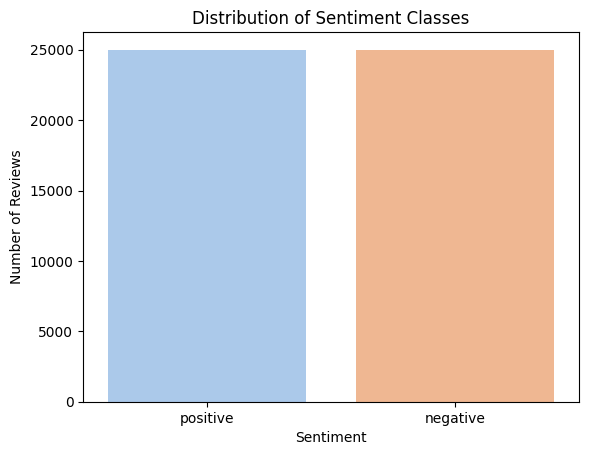

In [ ]:
#Check the Class Distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x="sentiment", hue="sentiment", palette="pastel")
plt.title("Distribution of Sentiment Classes")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()

The Class Distribution plot above shows that the dataset is evenly split between positive and negative reviews, with no class bias.

To begin exploration, the average review length (in words) is analysed to understand the distribution of input sizes, and it is seen that most reviews are less than 500 words.

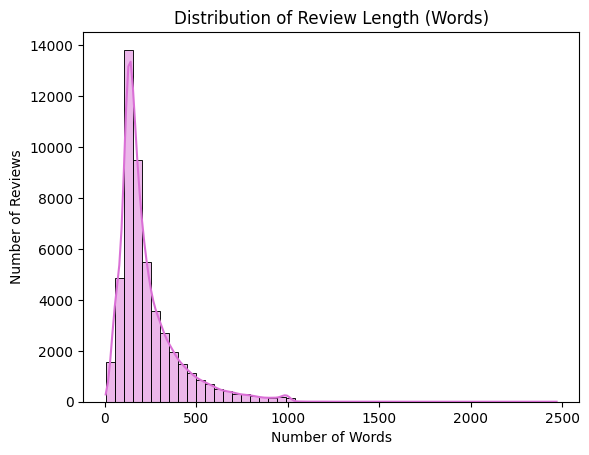

,review,sentiment,review_length
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


In [ ]:
#Check the average review length

#New column for review length
df["review_length"] = df["review"].apply(lambda x: len(x.split()))

sns.histplot(df["review_length"], bins=50, kde=True, color="orchid")
plt.title("Distribution of Review Length (Words)")
plt.xlabel("Number of Words")
plt.ylabel("Number of Reviews")
plt.show()

df.head()

Finding out the most common words for each class is useful, as it would allow non-essential words to be removed and stop impacting the class distribution.

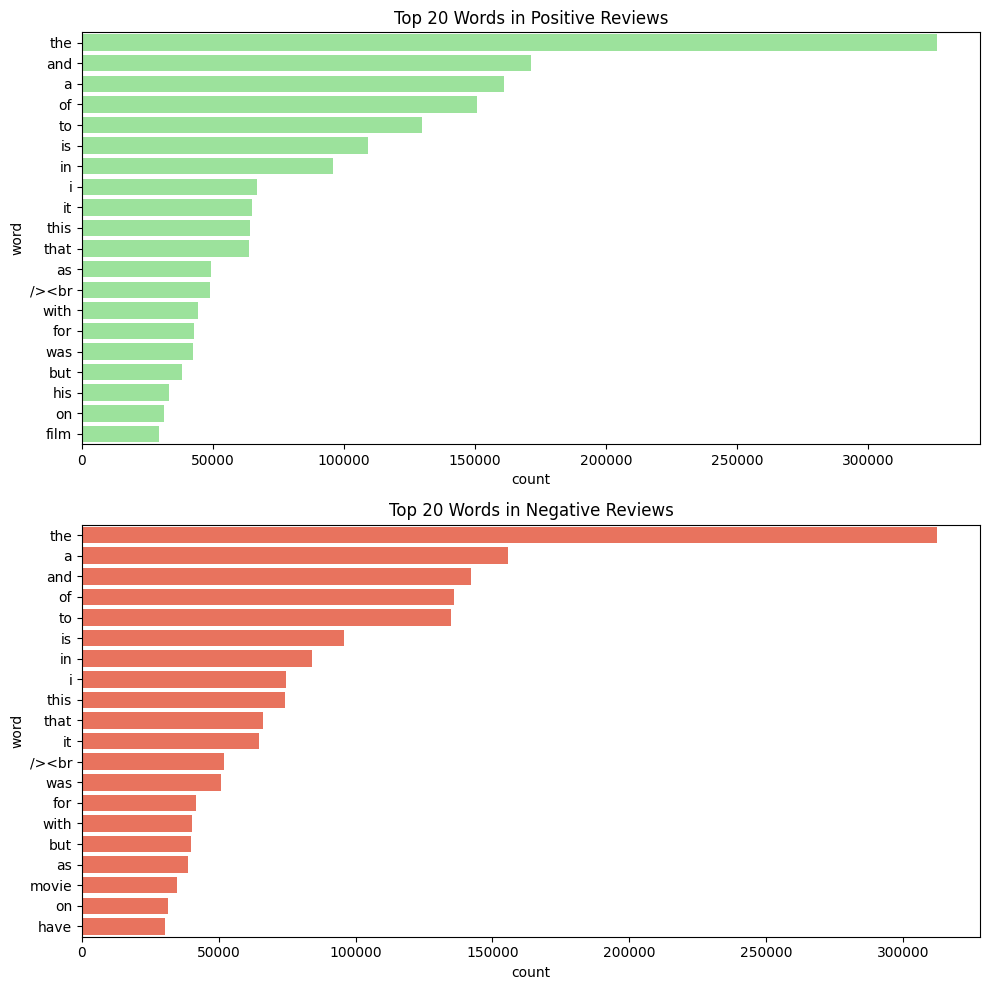

In [ ]:
#Check Top Words per Sentiment Class

#Separate positive and negative reviews
positive_reviews = df[df["sentiment"] == "positive"]
negative_reviews = df[df["sentiment"] == "negative"]

#Tokenize each review into words
positive_words = " ".join(positive_reviews["review"]).lower().split()
negative_words = " ".join(negative_reviews["review"]).lower().split()

#Get 20 most common words in each
from collections import Counter
top_positive = Counter(positive_words).most_common(20)
top_negative = Counter(negative_words).most_common(20)

#Convert to a Data Frame for plotting
top_positive_df = pd.DataFrame(top_positive, columns=["word", "count"])
top_negative_df = pd.DataFrame(top_negative, columns=["word", "count"])

# Plot
fig, axes = plt.subplots(2, 1, figsize=(10, 10))
sns.barplot(data=top_positive_df, x="count", y="word", ax=axes[0], color="lightgreen")
axes[0].set_title("Top 20 Words in Positive Reviews")

sns.barplot(data=top_negative_df, x="count", y="word", ax=axes[1], color="tomato")
axes[1].set_title("Top 20 Words in Negative Reviews")

plt.tight_layout()
plt.show()


The most common words across both classes are meaningless, so these should be removed, along with the basic stopwords.

In [ ]:
#Preprocessing

import re
import string
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords

#Stopword list
custom_stopwords = set(["film", "movie"])
all_stopwords = set(stopwords.words("english")).union(custom_stopwords)

def clean_text(text):
    text = text.lower()
    text = re.sub(r"<br\s*/?>", " ", text)  #Remove <br>, <br/>, <br />
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  #Get rid of punctuation
    words = text.split()
    words = [word for word in words if word not in all_stopwords]  #Remove all stopwords
    return " ".join(words)

#Apply data cleaning
df["clean_review"] = df["review"].apply(clean_text)
df["clean_tokens"] = df["clean_review"].apply(lambda x: x.split())

df[["review", "clean_review"]].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,clean_review
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...


To see the effect of the cleaning, the top words per Sentiment Class should be checked again. Also, Stemming or Lemmatisation are good ways of making the data easier to work with, since it shortens words to their basic form.

A sample of the processed data is displayed after this code block to check the impact of preprocessing.


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


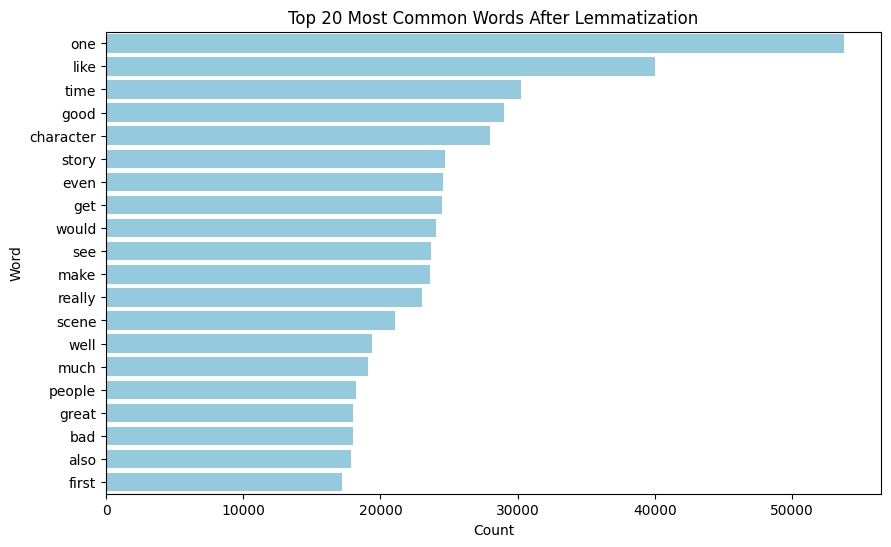

,review,clean_review,lemmatized_review
15464,The BFG is one of Roald Dahl's most cherished ...,bfg one roald dahls cherished books animated a...,bfg one roald dahl cherished book animated ada...
28967,This was the very first kung fu movie that I h...,first kung fu ever seen dubbing greatest alot ...,first kung fu ever seen dubbing greatest alot ...
5616,"When we were in junior high school, some of us...",junior high school us boys would occasionally ...,junior high school u boy would occasionally se...


In [ ]:
#Lemmatisation (Makes data more readable than Stemming)
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

# Apply lemmatisation
df["lemmatized_tokens"] = df["clean_tokens"].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])
df["lemmatized_review"] = df["lemmatized_tokens"].apply(lambda tokens: " ".join(tokens))


#Re-check Top Words after cleaning
from collections import Counter

#Flatten the list of all words
lemmatized_words = [word for review in df["lemmatized_tokens"] for word in review]
top_lemmatized = Counter(lemmatized_words).most_common(20)
top_lemmatized_df = pd.DataFrame(top_lemmatized, columns=["word", "count"])

#Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_lemmatized_df, x="count", y="word", color="skyblue")
plt.title("Top 20 Most Common Words After Lemmatization")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

df[["review", "clean_review", "lemmatized_review"]].sample(3)


## **Section 2 : Representation Learning**

---



This section includes common techniques in NLP that will convert text data into numbers, so that in later sections the models can work with it. The methods chosen have been Word2Vec and TF-IDF Vectorization.

* TF-IDF (Term Frequency - Inverse Document Frequency) transforms each review into a numerical vector, based on how important each word is in the dataset. The top 10.000 most relevant words were chosen, to simplify the process. The result of this technique doesn't rely on word order.

* Word2Vec (SkipGram model) was trained on the lemmatised tokens to learn a 100-dimensional vector representation for each word. To represent each review, the vectors of its words were averaged, so that the semantics are captured.




In [ ]:
#Representation Learning

from gensim.models import Word2Vec
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

#Downsample dataset and shuffle rows for balance
df_size = 10000
df_sampled = df.groupby("sentiment", group_keys=False).apply(lambda x: x.sample(df_size // 2, random_state=42)).reset_index(drop=True)
df_sampled = df_sampled.sample(frac=1, random_state=42).reset_index(drop=True)

#Prepare lemmatised tokens into string format for TF-IDF
df_sampled["lemmatized_review"] = df_sampled["lemmatized_tokens"].apply(lambda x: " ".join(x))

#TF-IDF Vectorization (strings to vectors of numbers)
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
X_tfidf = tfidf_vectorizer.fit_transform(df_sampled["lemmatized_review"])
X_tfidf = X_tfidf.toarray()

#Convert sentiment to binary (1;positive, 0;negative)
sentiment_labels = {"positive": 1, "negative": 0}
y = df_sampled["sentiment"].map(sentiment_labels).values

#Word2Vec (SkipGram model)
w2v_model = Word2Vec(
    sentences=df_sampled["lemmatized_tokens"],
    vector_size=100,
    window=5, #Looks for context
    min_count=2,
    workers=4,
    sg=1
)

#Function to get the average vector per review
def get_average_vector(tokens, model, vector_size):
    valid_tokens = [token for token in tokens if token in model.wv]
    if not valid_tokens:
        return np.zeros(vector_size)
    return np.mean([model.wv[token] for token in valid_tokens], axis=0)

X_w2v = np.array([get_average_vector(tokens, w2v_model, 100) for tokens in df_sampled["lemmatized_tokens"]])

#Shapes
print("TF-IDF shape:", X_tfidf.shape)
print("Word2Vec shape:", X_w2v.shape)
print("Labels shape:", y.shape)

df_sampled["sentiment"].value_counts()



/tmp/ipython-input-4188566861.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df.groupby("sentiment", group_keys=False).apply(lambda x: x.sample(df_size // 2, random_state=42)).reset_index(drop=True)


TF-IDF shape: (10000, 10000)
Word2Vec shape: (10000, 100)
Labels shape: (10000,)


,count
sentiment,
positive,5000
negative,5000


## **Section 3 : Algorithms**

---



Describe the theory behind the algorithms to be applied. (500 Words)

Describe the Machine Learning models which you will compare to perform the selected task. Consider reviewing Weeks 4 – 8 for ideas.

*Implemented and described at least two NLP/IR models with significant advancements beyond what was demonstrated in the lectures or lab exercises.*

In [ ]:
#Implement 2 NLP algorithms. Consider reviewing Weeks 4 – 8 for ideas.

## **Section 4 : Evaluation**

---



Describe the evaluation process, and analyse the results. (200 Words)


Depending on the task you adopt, there are several different ways you may wish to evaluate the proposed NLP system. You should demonstrate your understanding by suggesting an appropriate evaluation strategy here (which suits both the task and the data). The report should then conclude with a description of the outcome of the comparison, alongside any appropriate visualisation. Consider reviewing Weeks 4 – 8 for specific ideas related to some tasks, or Week 9 for ideas relating to explaining the outcomes of NLP systems.

*Captured, visualised and discussed at least two performance metrics which are well suited to the task or dataset. Discussion and analysis are comprehensive.*

In [ ]:
#Evaluate the algorithms using an appropriate testing strategy and metrics. Consider reviewing Weeks 4 – 8 for specific ideas related to some tasks, or Week 9 for ideas relating to explaining the outcomes of NLP systems.

## **Section 5 : Paper Overview**

---



Provide an overview of the paper and its contributions, including the task to be performed. (200 Words)  


It is understood that it is sometimes impossible to completely reproduce another author’s work, particularly in scenarios where they do not share certain parameters or use an alternative library from the one selected by the student. In such cases, the student may select the most appropriate strategy and continue the development (for example, if a parameter is not mentioned then you may wish to keep it at a library default, use a value from the lab exercises, or experiment). All that is required is a comment to highlight where this has been the case.
A reading list of papers is provided in CampusMoodle (broken down across relevant topics for each week). These should give ideas, but students may consider papers from any reputable source.
Students are encouraged to keep in mind resource requirements for experiments. NLP algorithms quickly increase in computational complexity, so please ensure you select something feasible.


*Paper is comprehensively described, and its contributions clearly understood.
Algorithm is accurately reproduced. Results are comprehensively analysed and compared with paper.*


## **Section 6 : Algorithms from Paper**

---



In [ ]:
#Implement the algorithm as described in the paper.

## **Section 7 : Evaluation of Implementation**

---



Analyse the results, highlighting and explaining any inconsistencies with those reported in the paper. (200 Words)


In [ ]:
#Evaluate the implementation using the same performance metric(s) as the selected paper.